---
# Аналитика в Яндекс.Афише
---

## Импорт библиотек
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных
___

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

## Изучение информации
___

In [3]:
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
visits.columns = ['device','end_ts','source_id','start_ts','uid']

In [5]:
visits[['end_ts','start_ts']] = visits[['end_ts','start_ts']].astype('datetime64')

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits = visits.query('start_ts <= end_ts')

In [8]:
visits.duplicated().sum()

0

In [9]:
visits['device'].value_counts()

desktop    262565
touch       96833
Name: device, dtype: int64

In [10]:
visits['source_id'].value_counts()

4     101794
3      85609
5      66905
2      47626
1      34121
9      13276
10     10025
7         36
6          6
Name: source_id, dtype: int64

---
Потребовалось изменить имена и типы данных столбцов, сделать срез по старту и концу сессии. Дубликаты найдены не были. Уже сейчас можно сказать, что с компьютера посещений намного больше, а рекламные источники 6 и 7 работают отвратительно.
___

In [11]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [12]:
orders = orders.rename(columns = {'Buy Ts':'buy_ts','Revenue':'revenue','Uid':'uid'})

In [13]:
orders['buy_ts'] = orders['buy_ts'].astype('datetime64')

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
orders.duplicated().sum()

0

In [16]:
orders = orders.query('revenue > 0')

---
Потребовалось изменить имена и типы данных столбцов. Дубликатов не нашел, со значениями групп все хорошо. Заказы с нулевой выручкой убрал.
___

In [17]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [18]:
costs['dt'] = costs['dt'].astype('datetime64')

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [20]:
costs.duplicated().sum()

0

In [21]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

---
Потребовалось изменить тип данных столбца dt. Дубликаты отсутствуют, имена столбцов приемлемы. Можно сказать, что именно бесплатные рекламные источники не привлекают трафик.
___

## Построение отетов и расчет метрик
___

### Продукт
___

- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

In [22]:
firts_ts = visits.groupby('uid').agg({'start_ts':'min'})
firts_ts.columns = ['first_session']

In [23]:
firts_ts

,first_session
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


In [24]:
full_visits = visits.join(firts_ts, on = 'uid')

In [25]:
full_visits['day'] = full_visits['start_ts'].astype('datetime64[D]')
full_visits['week'] = full_visits['start_ts'].astype('datetime64[W]')
full_visits['month'] = full_visits['start_ts'].astype('datetime64[M]')
full_visits['cohort'] = full_visits['first_session'].astype('datetime64[M]')

In [26]:
full_visits['lifetime'] = round((full_visits['month'] - full_visits['cohort']) / np.timedelta64(1,'M')).astype(int)

In [27]:
full_visits

,device,end_ts,source_id,start_ts,uid,first_session,day,week,month,cohort,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20,2017-12-14,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19,2018-02-15,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-05-20,2018-05-17,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27,2017-12-21,2017-12-01,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29,2017-07-27,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25,2018-01-25,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03,2018-03-01,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02,2017-11-02,2017-11-01,2017-11-01,0


In [28]:
def show(x):
    plt.title('График посещений за {}'.format(x))
    plt.xlabel('Дата')
    plt.ylabel('Количество посещений')
    plt.show()
    return

In [29]:
def show_users(df,x):
    
    pivot = df.pivot_table(index=x, columns='device', values='uid', aggfunc='nunique')
    df = df.groupby(x).agg({'uid':'nunique'})
        
    
    df.plot(style='oc',figsize=(16,7))
    plt.xlabel('Дата')
    show(x)
    
    df.plot(style='-m',figsize=(16,7))
    show(x)
         
    pivot.plot(style='x-',figsize=(16,7))
    plt.title('График посещений за {}'.format(x))
    show(x)
    
    print('Медиана количества посещений с компьютера:' ,pivot['desktop'].median())
    print('Среднее количество посещений с компьютера:' ,pivot['desktop'].mean())
    
    print('Медиана количества посещений с телефона:' ,pivot['touch'].median())
    print('Среднее количество посещений с телефона:' ,pivot['touch'].mean())

___
### Пользователей в день
___

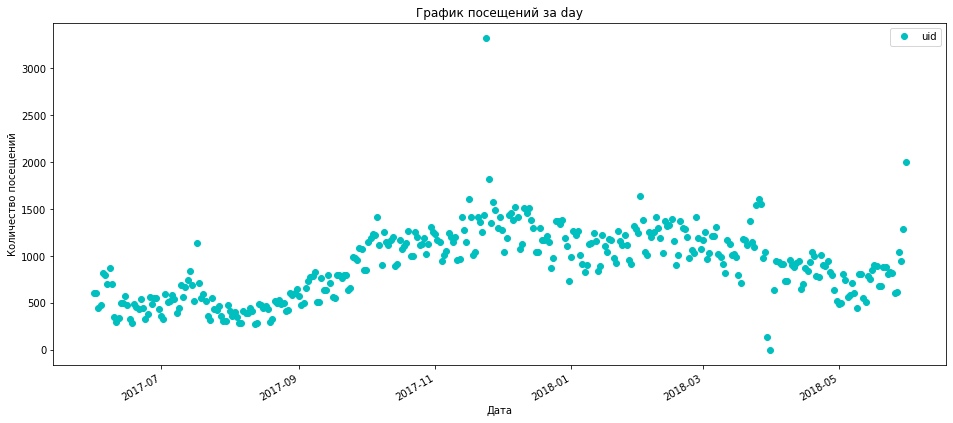

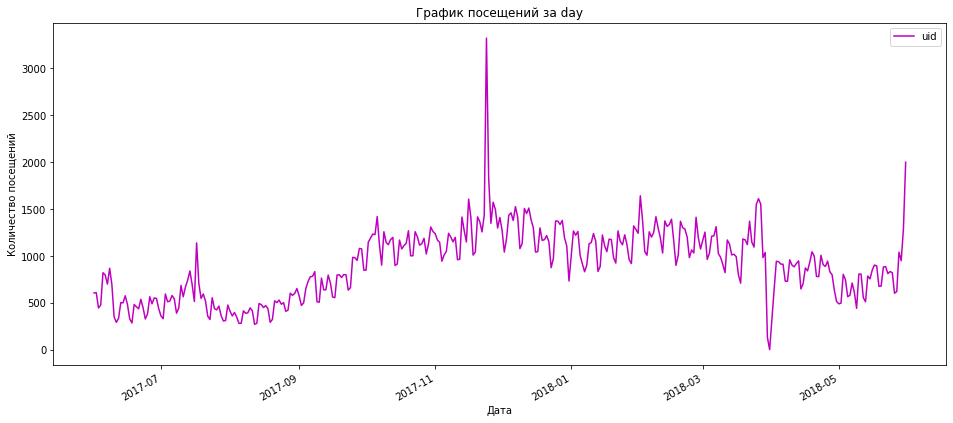

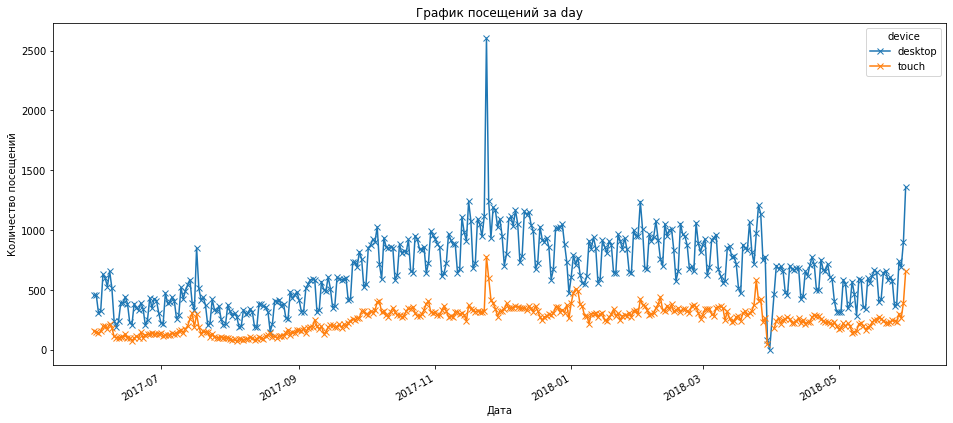

Медиана количества посещений с компьютера: 649.0
Среднее количество посещений с компьютера: 659.2445054945055
Медиана количества посещений с телефона: 264.0
Среднее количество посещений с телефона: 252.8732782369146


In [30]:
show_users(full_visits,'day')

---
- Наибольшее количестви посещений наблюдается с 2017-10 до 2018-04
- Пользователи намного чаще входят с компьютеров, но менее стабильно.
- Медиана количества посещений с компьютера: 649
- Медиана количества посещений с телефона: 264
___

___
### Пользователей в неделю
___

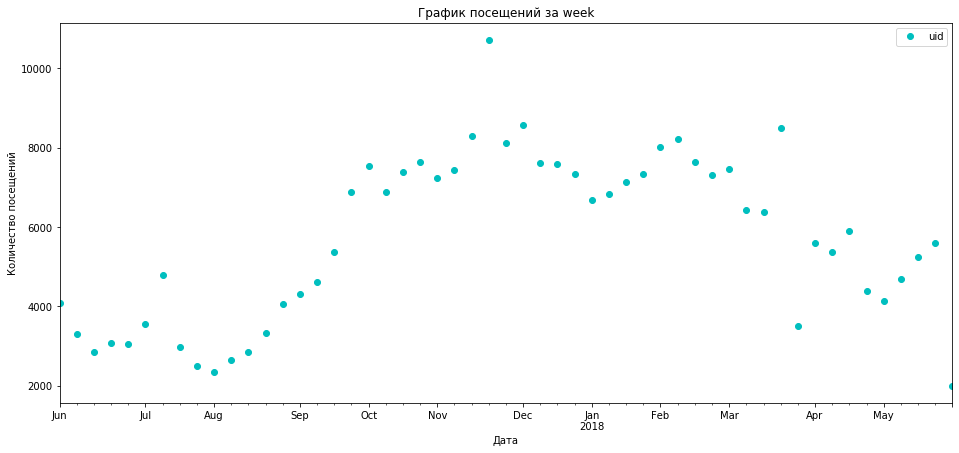

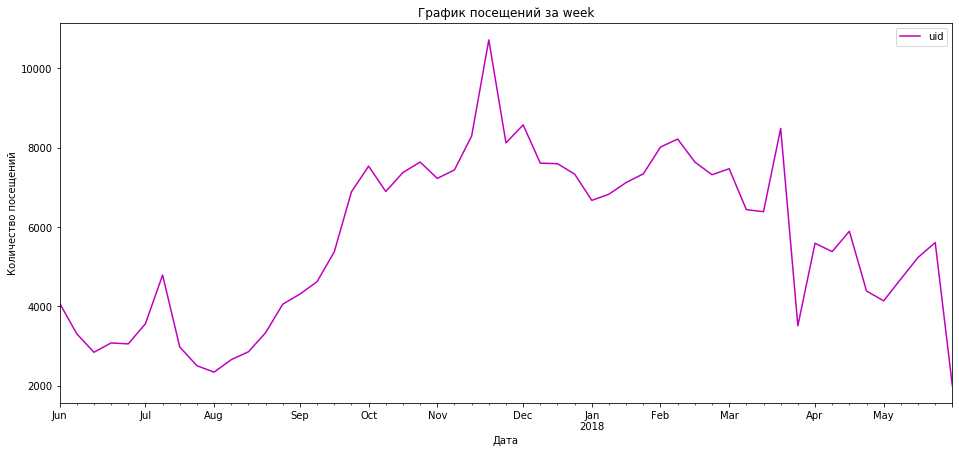

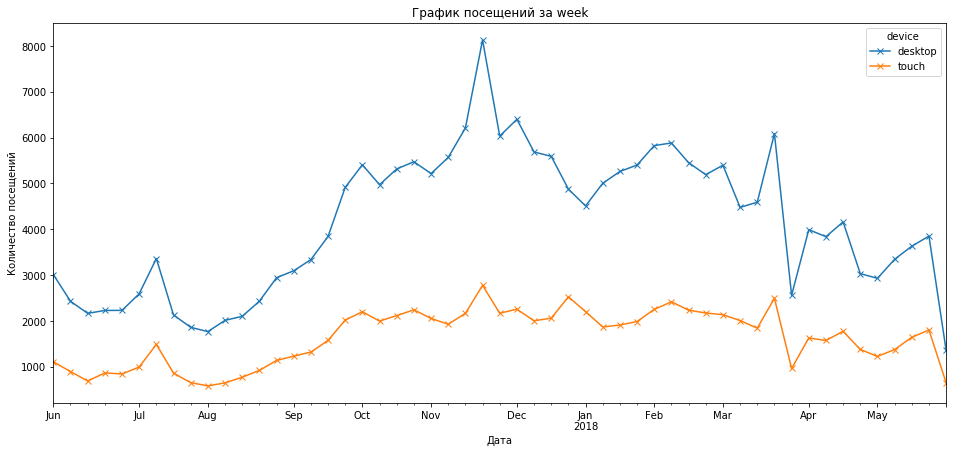

Медиана количества посещений с компьютера: 4162.0
Среднее количество посещений с компьютера: 4135.754716981132
Медиана количества посещений с телефона: 1805.0
Среднее количество посещений с телефона: 1637.2641509433963


In [31]:
show_users(full_visits,'week')

---
- Медиана количества посещений с компьютера: 4162
- Медиана количества посещений с телефона: 1805
___

___
### Пользователей в месяц
___

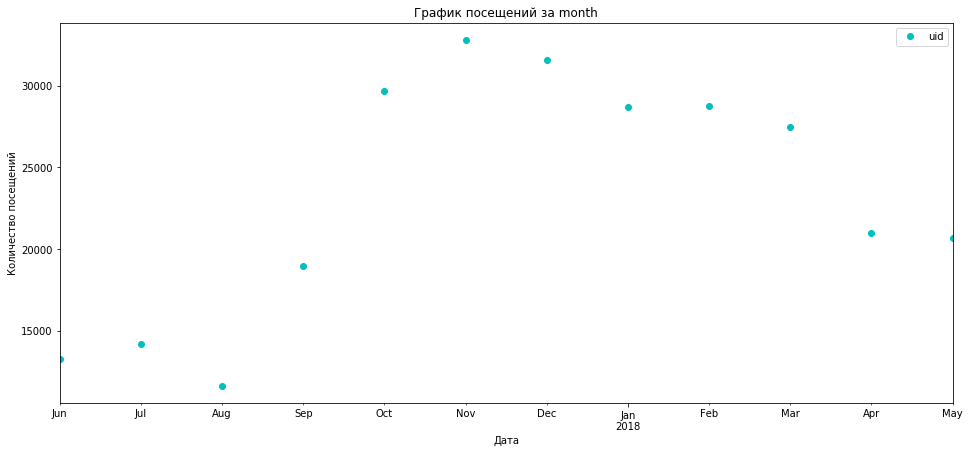

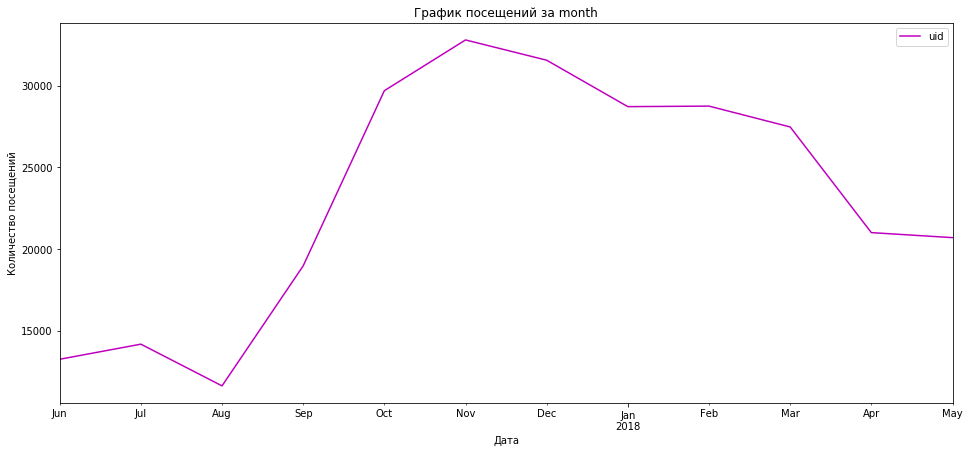

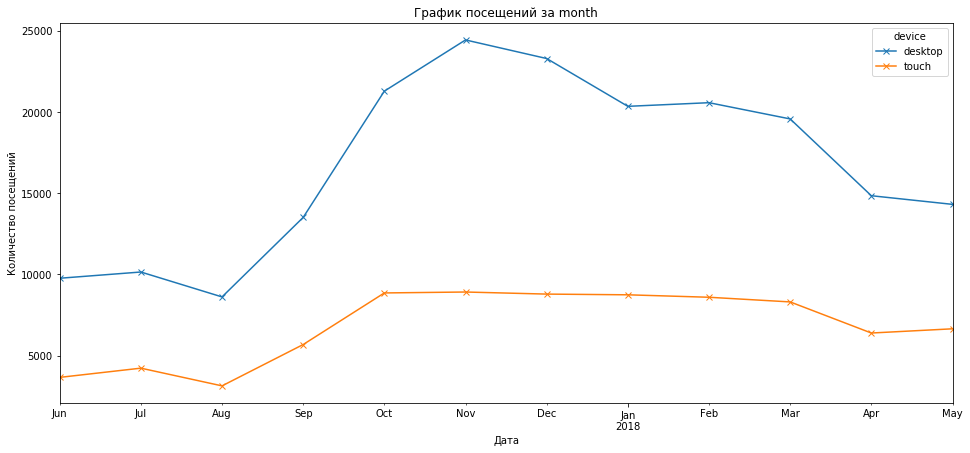

Медиана количества посещений с компьютера: 17209.0
Среднее количество посещений с компьютера: 16724.916666666668
Медиана количества посещений с телефона: 7475.0
Среднее количество посещений с телефона: 6825.916666666667


In [32]:
show_users(full_visits,'month')

---
- Наибольший рост происходит с августа по ноябрь 2017,с приходом 2018 ситуация начала ухудшаться.
- Медиана количества посещений с компьютера: 17209
- Медиана количества посещений с телефона: 6825

___
### Сессии за день
___

In [33]:
def ses_per_day(df):
    
    print('Сессии за день:')
    display(df.groupby('day').agg({'uid':'count'}).describe())
    
    print('В среднем на одного пользователя {:.2f} сессий в день'\
          .format(df.groupby('day')['uid'].count().mean() / df.groupby('day')['uid'].nunique().mean()))

    
    df.groupby('day').agg({'uid':'count'}).plot(style='om',figsize=(16,7))
    plt.title('Сессий в день')
    plt.show()

Сессии за день:


,uid
count,364.000000
mean,987.357143
std,418.985399
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


В среднем на одного пользователя 1.09 сессий в день


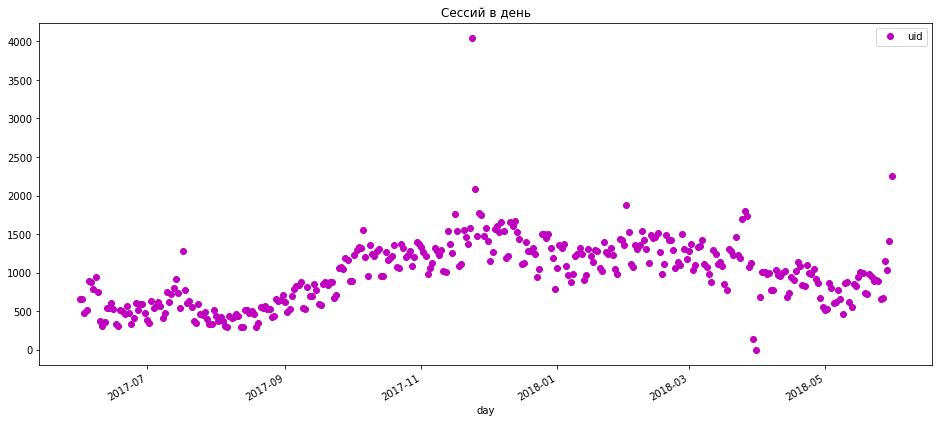

In [34]:
ses_per_day(full_visits)

Сессии за день:


,uid
count,364.000000
mean,721.332418
std,322.321413
min,1.000000
25%,457.250000
50%,711.000000
75%,961.500000
max,3152.000000


В среднем на одного пользователя 1.09 сессий в день


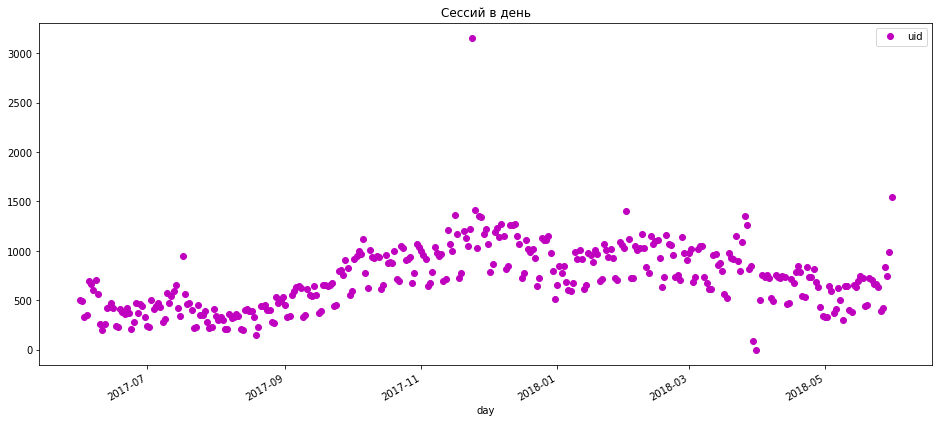

In [35]:
ses_per_day(full_visits.query('device == "desktop"'))

Сессии за день:


,uid
count,363.000000
mean,266.757576
std,110.862623
min,47.000000
25%,181.000000
50%,278.000000
75%,337.000000
max,890.000000


В среднем на одного пользователя 1.05 сессий в день


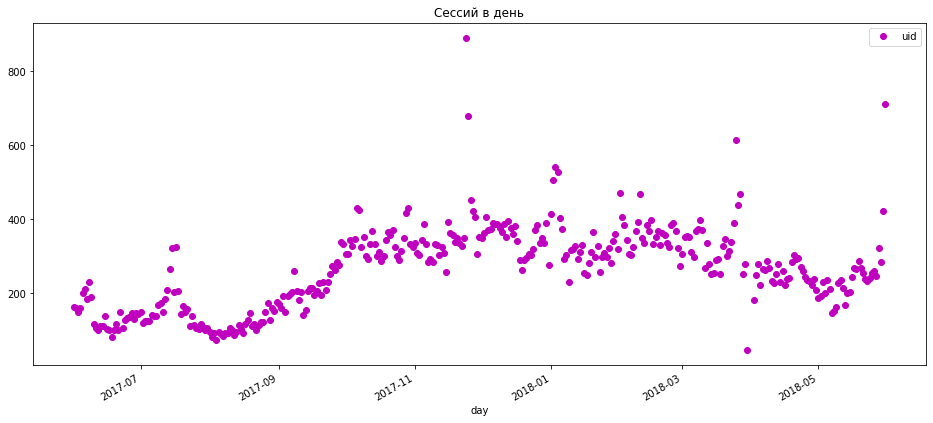

In [36]:
ses_per_day(full_visits.query('device == "touch"'))

---
- В среднем происходит 987 сессий в день
- В среднем 721 сессий происходит с комрьютера
- Графики достаточно схожи, главное различие - масштаб
- В среднем на одного пользователя приходится 1.09 сессий в день
___

---
### Длительность сессий
___

In [37]:
full_visits['duration_sec'] = (full_visits['end_ts'] - full_visits['start_ts']).dt.seconds

In [38]:
full_visits['duration_sec'].describe()

count    359398.000000
mean        643.042287
std         997.105212
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: duration_sec, dtype: float64

In [39]:
print('Мода длительности:' ,full_visits['duration_sec'].mode()[0])
print('Медиана длительности:' ,full_visits['duration_sec'].median())

Мода длительности: 60
Медиана длительности: 300.0


In [40]:
print('Мода длительности с компьютера:' ,full_visits.query('device == "desktop"')['duration_sec'].mode()[0])
print('Медиана длительности с компьютера:' ,full_visits.query('device == "desktop"')['duration_sec'].median())

Мода длительности с компьютера: 60
Медиана длительности с компьютера: 360.0


In [41]:
print('Мода длительности с телефона:' ,full_visits.query('device == "touch"')['duration_sec'].mode()[0])
print('Медиана длительности с телефона:' ,full_visits.query('device == "touch"')['duration_sec'].median())

Мода длительности с телефона: 60
Медиана длительности с телефона: 180.0


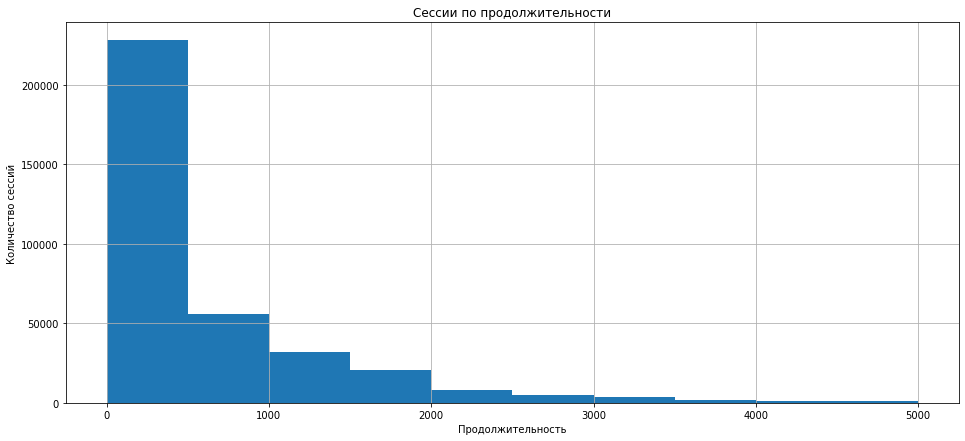

In [42]:
full_visits['duration_sec'].hist(bins=10, range=(0, 5000), figsize=(16,7))
plt.title('Сессии по продолжительности')
plt.xlabel('Продолжительность')
plt.ylabel('Количество сессий')
plt.show()

---
- Мода для каждого типа устройства одна
- Медианы различаются с отношением 1 к 2 в пользу компьютеров
- Медиана длительности сессии с компьютера равна 6 минутам
- Медиана длительности сиссии с телефона равна 3 минутам
- 75% сессий длятся меньше 14 минут
___

---
### Рассчет Retention Rate
___

In [43]:
cohorts_all = full_visits.groupby(['cohort','lifetime']).agg({'uid':'nunique'}).reset_index()

cohort_0_all = cohorts_all.query('lifetime == 0')[['cohort','uid']]

cohort_0_all = cohort_0_all.rename(columns = {'uid':'cohort_users'})

cohorts_all = cohorts_all.merge(cohort_0_all, on = 'cohort') 

cohorts_all['retention'] = cohorts_all['uid'] / cohorts_all['cohort_users']

In [44]:
cohorts_desktop = full_visits.query('device == "desktop"').groupby(['cohort','lifetime']).agg({'uid':'nunique'}).reset_index()

cohort_0_desktop = cohorts_desktop.query('lifetime == 0')[['cohort','uid']]

cohort_0_desktop = cohort_0_desktop.rename(columns = {'uid':'cohort_users'})

cohorts_desktop = cohorts_desktop.merge(cohort_0_desktop, on = 'cohort') 

cohorts_desktop['retention'] = cohorts_desktop['uid'] / cohorts_desktop['cohort_users']

In [45]:
cohorts_touch = full_visits.query('device == "touch"').groupby(['cohort','lifetime']).agg({'uid':'nunique'}).reset_index()

cohort_0_touch = cohorts_touch.query('lifetime == 0')[['cohort','uid']]

cohort_0_touch = cohort_0_touch.rename(columns = {'uid':'cohort_users'})

cohorts_touch = cohorts_touch.merge(cohort_0_touch, on = 'cohort') 

cohorts_touch['retention'] = cohorts_touch['uid'] / cohorts_touch['cohort_users']

In [46]:
def heat_map(cohort_device,df_device):
            
    retention_pivot = cohort_device.pivot_table(index = 'cohort',columns = 'lifetime', values = 'retention', aggfunc = 'sum') # Сделаю сводную таблицу
    retention_pivot.index = retention_pivot.index.strftime("%Y/%m")

    plt.figure(figsize =(20,7))
    sns.heatmap(retention_pivot, annot = True, fmt = '.1%',linewidths = 1, linecolor = 'white',vmax = .1, cmap= 'bone')
    plt.title('Retention Rate, %')
    plt.show()

    
    
    device_pivot = df_device.pivot_table(index = 'cohort',columns = 'lifetime', values = 'uid', aggfunc = 'nunique')
    device_pivot.index = device_pivot.index.strftime("%Y/%m")

    plt.figure(figsize =(20,7))
    sns.heatmap(device_pivot, annot = True,linewidths = 1,fmt = '.0f', linecolor = 'white', vmax = 2200, cmap= 'YlGnBu')
    plt.title('Retention Rate')
    plt.show()

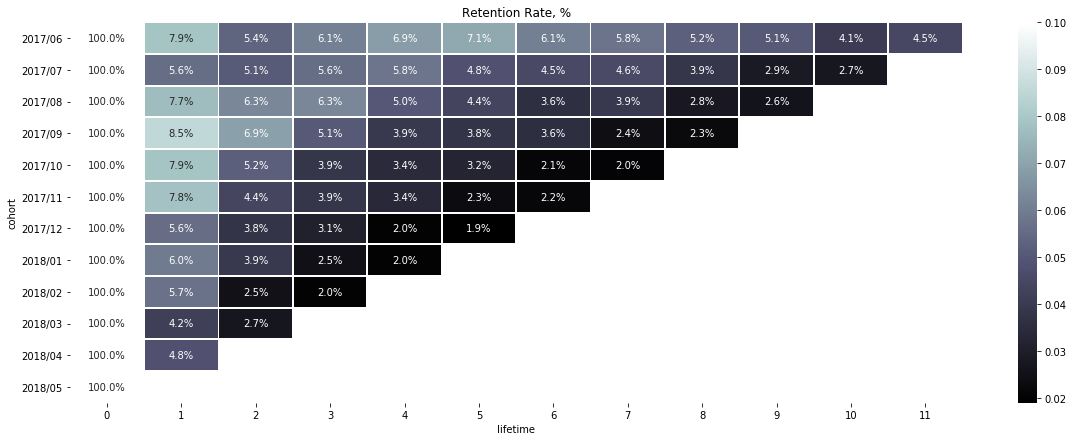

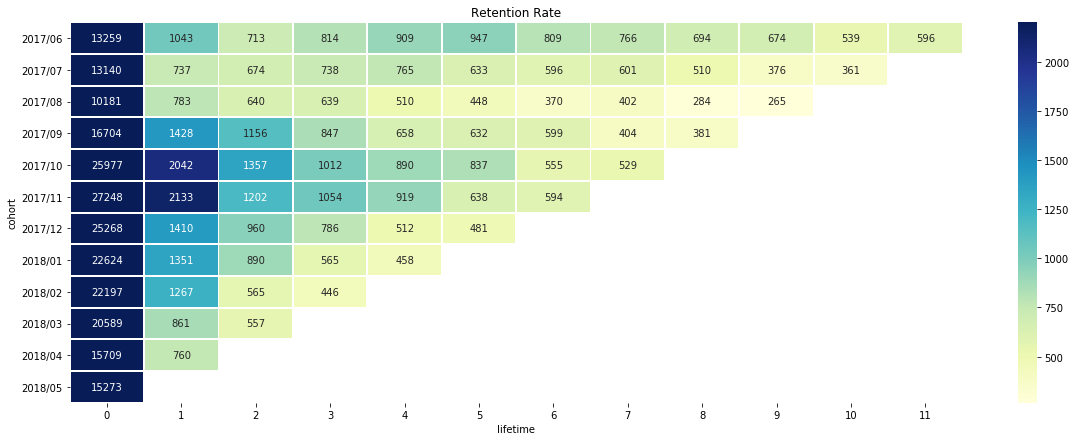

In [47]:
heat_map(cohorts_all,full_visits) 

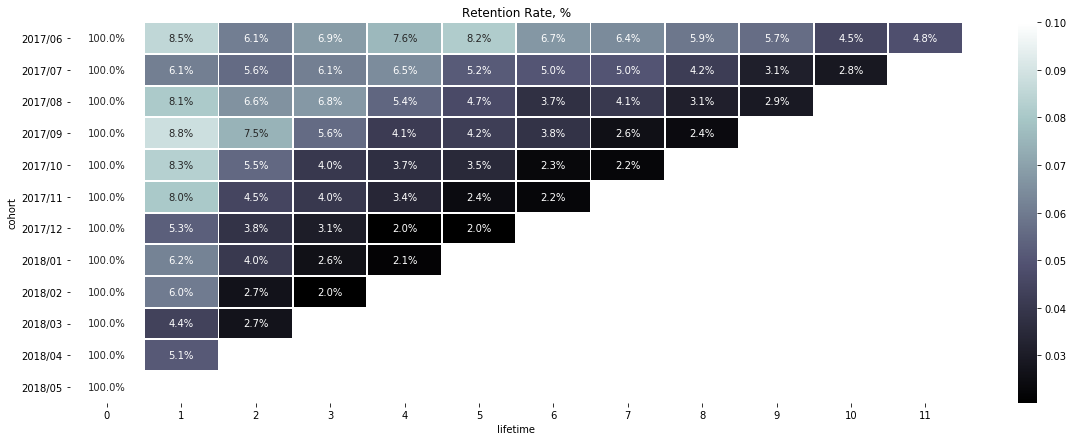

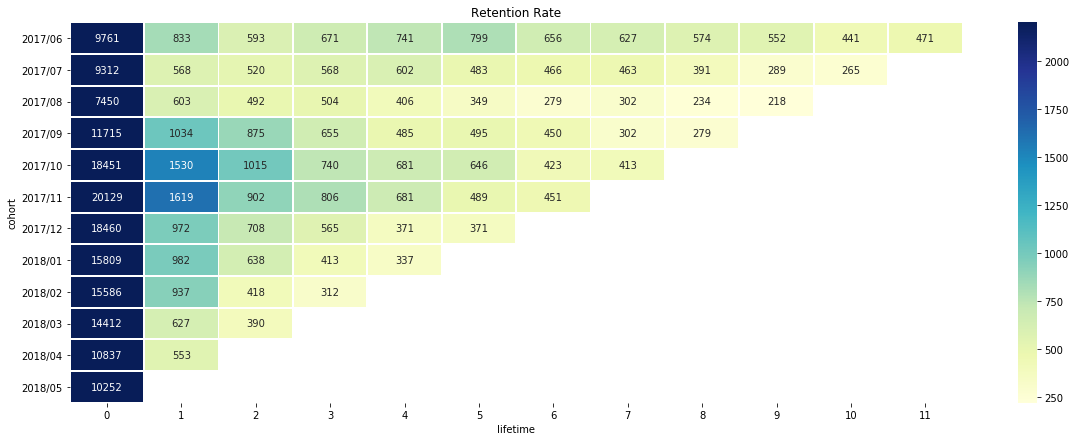

In [48]:
heat_map(cohorts_desktop,full_visits.query('device == "desktop"')) 

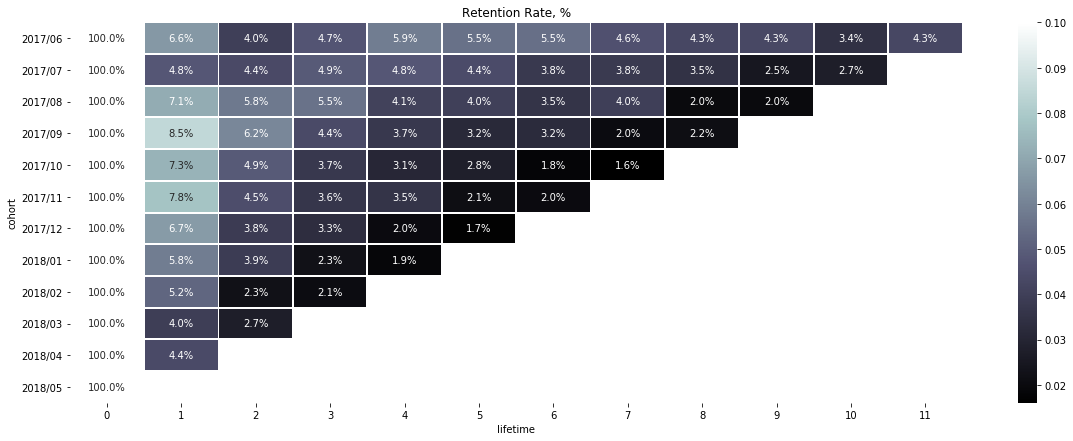

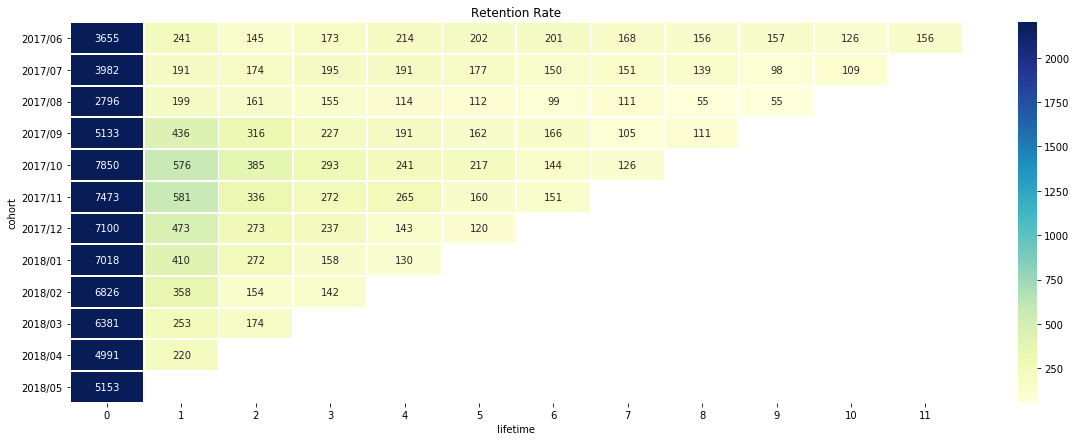

In [49]:
heat_map(cohorts_touch,full_visits.query('device == "touch"')) 

---
- Возвращается действительно малая часть пользователей. Если в первый месяц, в среднем, возвращается 6-7%, то со временем Retention Rate падает до 4%
- Пользователи, заходящие с телефона уходят более стремительно
- На метрику влияет сезон, зимой возвращений больше


---
## Выводы по продукту
___

1. Основная аудитория использует компьютер, а длительность визитов с него в 2 раза выше, чем с телефона
1. Медиана времени посещения - 300 секунд, мода - 60 секунд
1. Большинство использует сайт меньше 15 минут
1. В среднем происходит около тысячи сессий в день
1. Наибольший рост посещаемости происходит с августа по ноябрь 2017,с приходом 2018 ситуация начала ухудшаться
1. Retention Rate со времене падает, в среднем, с 7% до 4% 
1. Зимой пользователи возвращаются чаще
___

### Продажи
___

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

### Когда люди начинают покупать?
___

In [50]:
buy_time = orders.groupby('uid')['buy_ts'].min().reset_index()

buy_time = buy_time.merge(full_visits.groupby('uid')['first_session'].min().reset_index(), how = 'left') 

buy_time['firts_buy'] = buy_time['buy_ts'] - buy_time['first_session']


In [51]:
buy_time = buy_time.merge(
    full_visits[['uid','source_id','start_ts','device']], left_on = ['uid','first_session'], right_on = ['uid','start_ts'],how='left')

In [52]:
buy_time

,uid,buy_ts,first_session,firts_buy,source_id,start_ts,device
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106 days 23:02:00,2,2017-09-18 22:49:00,desktop
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,10,2017-06-03 10:13:00,touch
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0 days 01:19:00,3,2017-10-11 17:14:00,desktop
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0 days 19:44:00,5,2018-01-27 20:10:00,desktop
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,5,2017-11-24 10:14:00,desktop
...,...,...,...,...,...,...,...
36504,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95 days 19:33:00,5,2017-08-20 13:30:00,touch
36505,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0 days 00:07:00,3,2017-09-22 23:48:00,desktop
36506,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231 days 11:03:00,2,2017-08-07 11:51:00,desktop
36507,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103 days 09:33:00,3,2017-11-07 10:01:00,desktop


In [53]:
def buy(df):
   
    display(df.describe().reset_index())
    print('Мода:',df.mode()[0])
    print('Медиана:',df.median())

    (df / np.timedelta64(24,'h')).plot(kind = 'hist', figsize=(16,7),bins = 200, color = 'm')
    
    plt.xlim(0,15)
    plt.xlabel('Количество дней')
    plt.ylabel('Количество')
    plt.title('Когда люди начинают покупать')
    plt.show()

,index,firts_buy
0,count,36509
1,mean,16 days 22:00:42.410364
2,std,47 days 02:16:55.368087
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:16:00
6,75%,2 days 00:22:00
7,max,363 days 07:04:00


Мода: 0 days 00:01:00
Медиана: 0 days 00:16:00


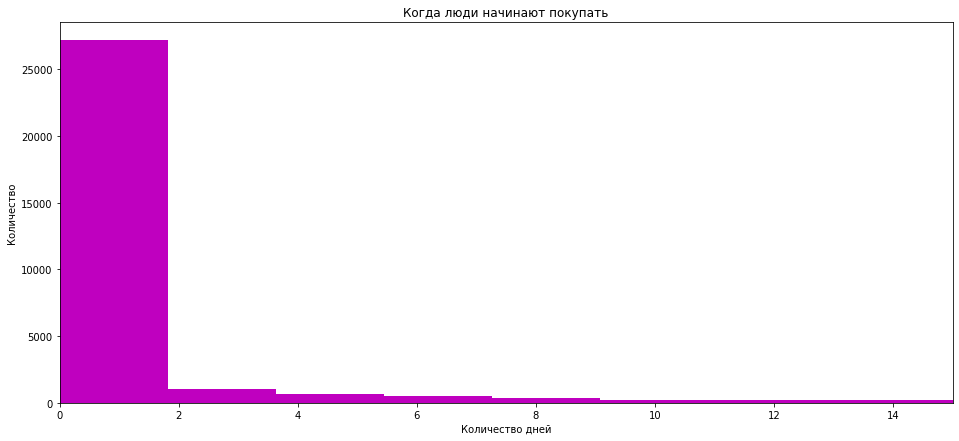

In [54]:
buy(buy_time['firts_buy'])

,index,firts_buy
0,count,29198
1,mean,16 days 00:36:29.531474
2,std,46 days 04:30:04.587729
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:15:00
6,75%,1 days 03:11:45
7,max,363 days 07:04:00


Мода: 0 days 00:01:00
Медиана: 0 days 00:15:00


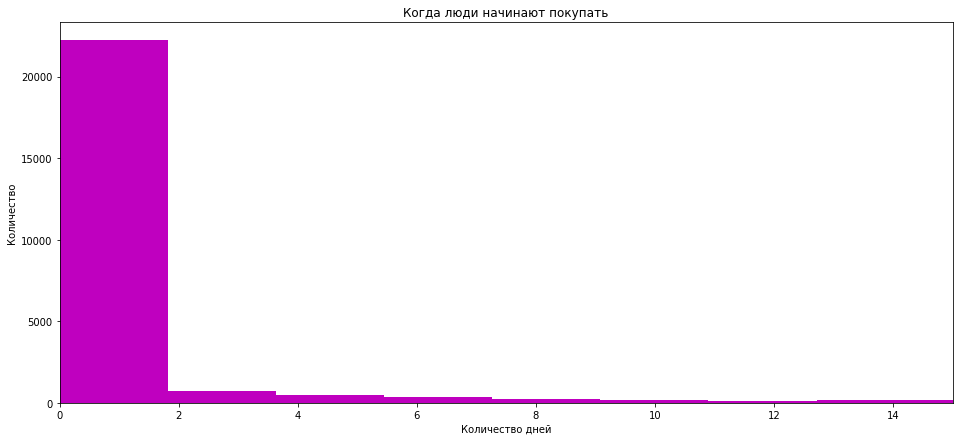

In [55]:
buy(buy_time.query('device == "desktop"')['firts_buy'])

,index,firts_buy
0,count,7311
1,mean,20 days 11:29:29.117767
2,std,50 days 09:41:05.648769
3,min,0 days 00:00:00
4,25%,0 days 00:04:00
5,50%,0 days 00:38:00
6,75%,6 days 23:17:30
7,max,362 days 16:47:00


Мода: 0 days 00:00:00
Медиана: 0 days 00:38:00


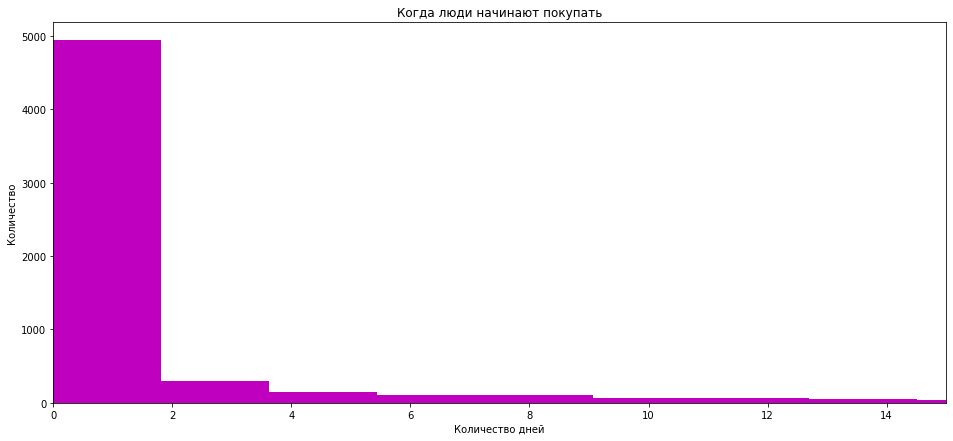

In [56]:
buy(buy_time.query('device == "touch"')['firts_buy'])

---
- Большая часть (75%) совершает покупки в первые два дня, а половина в первые 16 минут
- Мода равна одной минуте
- Наиболее часто люди покупают в промежутке от 1 до 16 минут
___


## Сколько раз покупают за период?
___

In [57]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]') 

orders = orders[orders['buy_month'] < '2018-06-01']

display(orders.groupby('buy_month')['uid'].count())

buy_month
2017-06-01    2353
2017-07-01    2362
2017-08-01    1803
2017-09-01    3383
2017-10-01    5677
2017-11-01    5644
2017-12-01    6206
2018-01-01    4721
2018-02-01    5280
2018-03-01    5325
2018-04-01    3265
2018-05-01    4344
Name: uid, dtype: int64

In [60]:
print('Количество покупок в среднем за месяц с июня 2017 по май 2018:',\
      int(orders.groupby('buy_month')['uid'].count().mean()))

print('Покупают в среднем за периода с июня 2017 по май 2018',\
      round((orders.groupby('buy_month')['uid'].count() / orders.groupby('buy_month')['uid'].nunique()).mean(),2))

Количество покупок в среднем за месяц с июня 2017 по май 2018: 4196
Покупают в среднем за периода с июня 2017 по май 2018 1.22


In [61]:
buy_time['cohort'] = buy_time['first_session'].astype('datetime64[M]')


orders = orders.merge(buy_time[['uid','source_id','device','cohort']]) # 50414

orders['lifetime_cohort'] = round((orders['buy_month'] - orders['cohort']) / np.timedelta64(1,'M')).astype(int)

In [62]:
orders

,buy_ts,revenue,uid,buy_month,source_id,device,cohort,lifetime_cohort
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,desktop,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,desktop,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,desktop,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,desktop,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,desktop,2017-06-01,0
...,...,...,...,...,...,...,...,...
50358,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01,2,desktop,2017-12-01,5
50359,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,4,touch,2018-05-01,0
50360,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,10,desktop,2018-05-01,0
50361,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,3,desktop,2018-05-01,0


In [63]:
cohorts_orders = orders.groupby(['cohort','lifetime_cohort']).agg(
    total_revenue = ('revenue','sum'),
    avg_revenue = ('revenue','mean'),
    count_buys = ('uid','count')
).reset_index()

In [64]:
cohorts_orders

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys
0,2017-06-01,0,9557.49,4.061832,2353
1,2017-06-01,1,2664.58,6.885220,387
2,2017-06-01,2,1464.69,5.444944,269
3,2017-06-01,3,3882.09,8.822932,440
4,2017-06-01,4,3940.59,7.651631,515
...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267
74,2018-03-01,2,774.77,3.854577,201
75,2018-04-01,0,8043.82,4.150578,1938
76,2018-04-01,1,1838.73,5.423982,339


In [65]:
cohorts_orders = cohorts_orders.merge(orders.groupby('cohort').agg(cohort_uid = ('uid','nunique')).reset_index())

cohorts_orders['buy_per_user'] = cohorts_orders['count_buys'] / cohorts_orders['cohort_uid']

In [66]:
cohorts_orders

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys,cohort_uid,buy_per_user
0,2017-06-01,0,9557.49,4.061832,2353,2922,0.805270
1,2017-06-01,1,2664.58,6.885220,387,2922,0.132444
2,2017-06-01,2,1464.69,5.444944,269,2922,0.092060
3,2017-06-01,3,3882.09,8.822932,440,2922,0.150582
4,2017-06-01,4,3940.59,7.651631,515,2922,0.176249
...,...,...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267,2838,0.094080
74,2018-03-01,2,774.77,3.854577,201,2838,0.070825
75,2018-04-01,0,8043.82,4.150578,1938,1888,1.026483
76,2018-04-01,1,1838.73,5.423982,339,1888,0.179555


In [67]:
def how_buy(df):
    cohorts_orders_in_func = df.groupby(['cohort','lifetime_cohort']).agg(
    total_revenue = ('revenue','sum'),avg_revenue = ('revenue','mean'),count_buys = ('revenue','count')).reset_index()
    
    cohorts_orders_in_func = cohorts_orders_in_func.merge(df.groupby('cohort').agg(cohort_uid = ('uid','nunique')).reset_index())

    cohorts_orders_in_func['buy_per_user'] = cohorts_orders_in_func['count_buys'] / cohorts_orders_in_func['cohort_uid']
    
    pivot_for_heatmap_in_func = cohorts_orders_in_func.pivot_table(index = 'cohort',columns = 'lifetime_cohort', values = 'buy_per_user', aggfunc = 'sum').cumsum(axis = 1)

    pivot_for_heatmap_in_func.index = pivot_for_heatmap_in_func.index.strftime('%Y/%m')

    
    plt.figure(figsize =(16,7))
    sns.heatmap(pivot_for_heatmap_in_func,annot = True, fmt = '.1f',linewidths = 1, linecolor = 'white')
    plt.xlabel('Возраст когорты')
    plt.ylabel('Когорта')
    plt.title('Сколько раз покупают за период в среднем')
    plt.show()


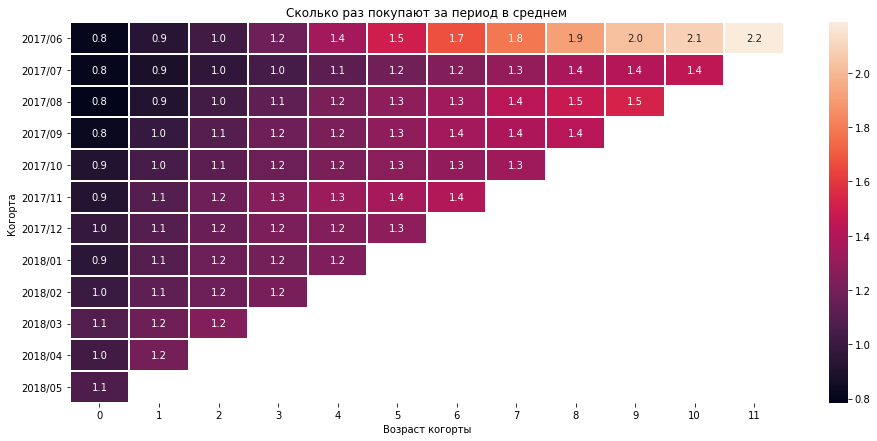

In [68]:
how_buy(orders)

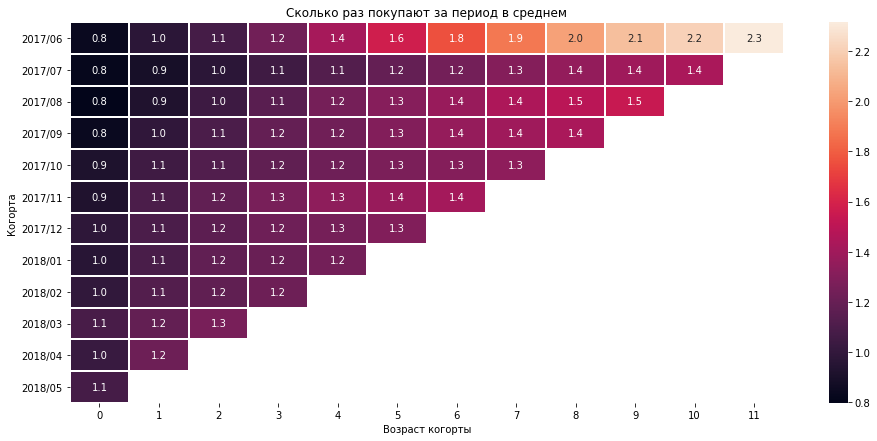

In [69]:
how_buy(orders.query('device == "desktop"'))

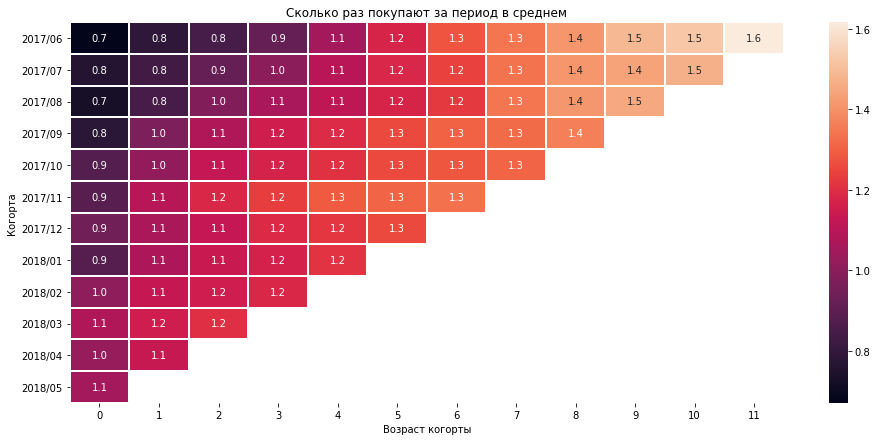

In [70]:
how_buy(orders.query('device == "touch"'))

---
- С возрастом когорты увеличивается количество покупок
- Клиенты чаще покупают с компьютера
___

---
## Какой средний чек?
___

In [71]:
def average_bill(df):
    
    print("Средний чек:", round(df['revenue'].mean()))
    
    df.groupby('buy_month')['revenue'].mean().plot(style='-o', figsize=(16,7), color = 'm')

    plt.title('Средний чек в зависимости от месяца')
    plt.xlabel('Месяц')
    plt.ylabel('Средний чек')
    plt.show()    

Средний чек: 5


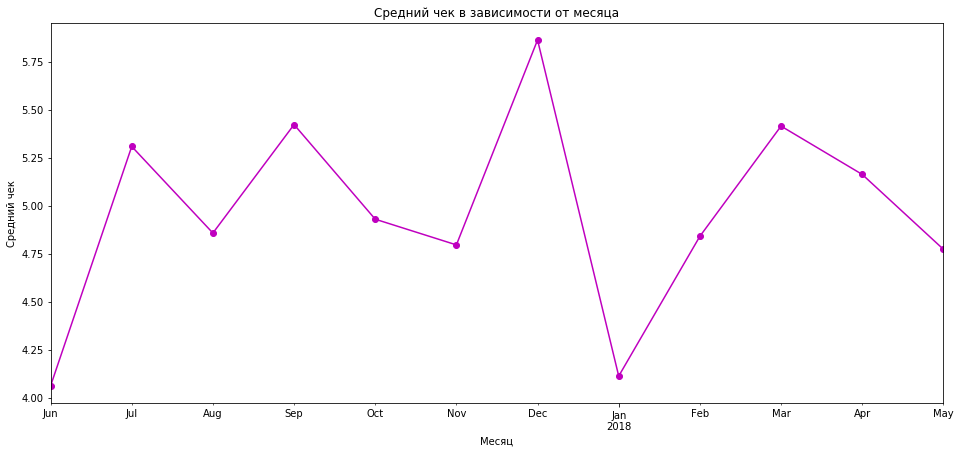

In [72]:
average_bill(orders)

Средний чек: 5


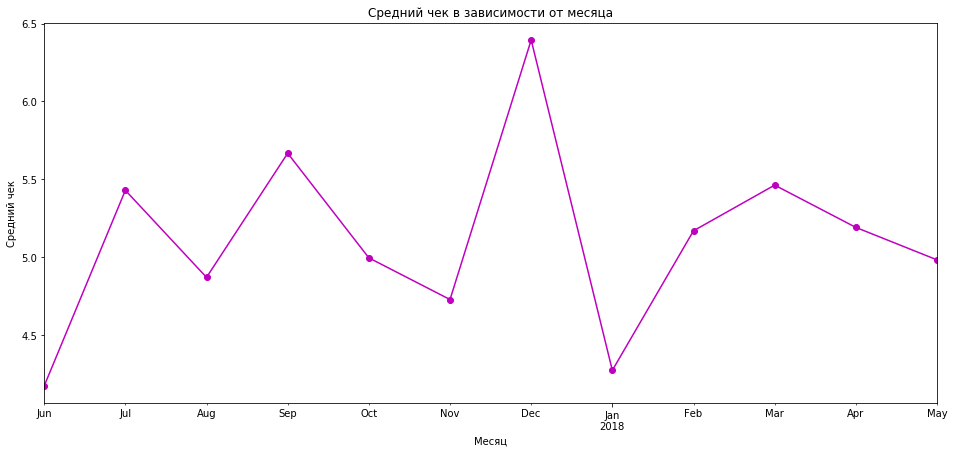

In [73]:
average_bill(orders.query('device == "desktop"'))

Средний чек: 4


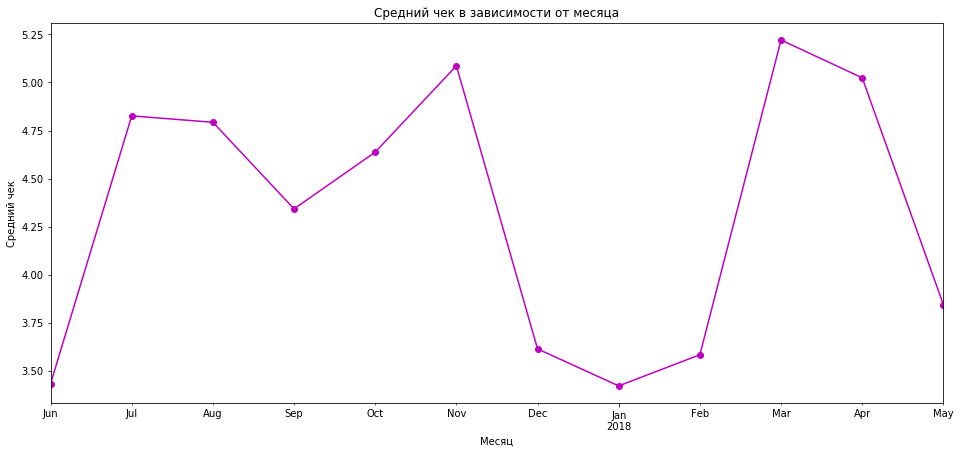

In [74]:
average_bill(orders.query('device == "touch"'))

---
- Бросаются в глаза проблемы с декабря 2017 по по февраль 2018 у мобильных устройств. Происходит из-за того, что зимой люди больше находяться дома, а за компьютером сидеть привычнее
- Больше всего покупают в декабре с компьютеров, готовятся к празднику
___

---
## Сколько денег приносят? (LTV)
___

In [75]:
buy_time = buy_time.merge(orders.groupby('uid')['revenue'].sum().reset_index(),on = 'uid')

In [76]:
cohort_0_all = cohort_0_all.merge(buy_time.groupby('cohort')['revenue'].sum().reset_index())

cohort_0_all['LTV'] = round(cohort_0_all['revenue'] / buy_time.groupby('cohort')['uid'].nunique().reset_index()['uid'],2)

In [77]:
cohort_0_all

,cohort,cohort_users,revenue,LTV
0,2017-06-01,13259,40026.05,13.70
1,2017-07-01,13140,17812.11,7.25
2,2017-08-01,10181,13461.87,7.82
3,2017-09-01,16704,33682.56,11.02
4,2017-10-01,25977,27857.69,5.96
5,2017-11-01,27248,24426.72,5.74
6,2017-12-01,25268,31157.85,7.66
7,2018-01-01,22624,14546.82,4.66
8,2018-02-01,22197,15061.29,4.73
9,2018-03-01,20589,13770.16,4.85


In [78]:
cohorts_orders['LTV'] = cohorts_orders['total_revenue'] / cohorts_orders['cohort_uid']

In [79]:
cohorts_orders

,cohort,lifetime_cohort,total_revenue,avg_revenue,count_buys,cohort_uid,buy_per_user,LTV
0,2017-06-01,0,9557.49,4.061832,2353,2922,0.805270,3.270873
1,2017-06-01,1,2664.58,6.885220,387,2922,0.132444,0.911903
2,2017-06-01,2,1464.69,5.444944,269,2922,0.092060,0.501263
3,2017-06-01,3,3882.09,8.822932,440,2922,0.150582,1.328573
4,2017-06-01,4,3940.59,7.651631,515,2922,0.176249,1.348593
...,...,...,...,...,...,...,...,...
73,2018-03-01,1,984.00,3.685393,267,2838,0.094080,0.346723
74,2018-03-01,2,774.77,3.854577,201,2838,0.070825,0.272999
75,2018-04-01,0,8043.82,4.150578,1938,1888,1.026483,4.260498
76,2018-04-01,1,1838.73,5.423982,339,1888,0.179555,0.973904


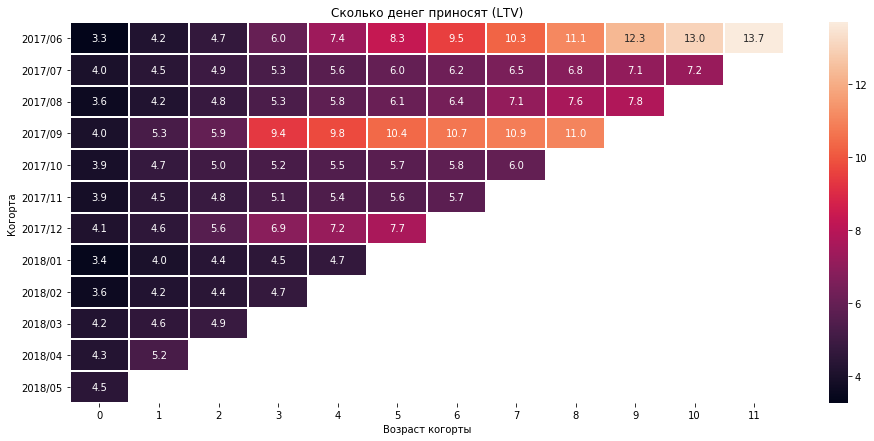

In [80]:
pivot_for_heatmap = cohorts_orders.pivot_table(index = 'cohort',columns = 'lifetime_cohort', values = 'LTV').cumsum(axis=1)
pivot_for_heatmap.index = pivot_for_heatmap.index.strftime('%Y/%m')


plt.figure(figsize =(16,7))
sns.heatmap(pivot_for_heatmap, annot = True, fmt = '.1f',linewidths = 1, linecolor = 'white')

plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.title('Сколько денег приносят (LTV)')
plt.show()

---
- Каждый месяц наблюдается прирост, покупки происходят
- У сентябрьской когорты наблюдается резкий прирост в декабре
___

In [81]:
# Сделаю цикл и добавлю LTV по источникам
# Сначало отсортирую по порядку
buy_time = buy_time.sort_values('source_id')

for s_id in buy_time['source_id'].unique():
    # Выбираю данные по каждому источники и группирую их по когортам и суммирую расходы.
    cohort_0_all['LVT_'+str(s_id)] = round((buy_time.query('source_id == @s_id').groupby('cohort')['revenue'].sum() / 
                                            buy_time.query('source_id == @s_id').groupby('cohort')['uid'].nunique()
                                            ).reset_index()[0],2)

In [82]:
cohort_0_all

,cohort,cohort_users,revenue,LTV,LVT_1,LVT_2,LVT_3,LVT_4,LVT_5,LVT_7,LVT_9,LVT_10
0,2017-06-01,13259,40026.05,13.70,41.29,20.88,6.62,14.89,10.61,1.22,7.19,2.85
1,2017-07-01,13140,17812.11,7.25,12.72,10.70,6.16,6.02,6.82,NaN,6.76,4.68
2,2017-08-01,10181,13461.87,7.82,20.83,7.11,5.77,5.75,9.23,NaN,5.48,5.12
3,2017-09-01,16704,33682.56,11.02,9.74,15.51,6.67,5.64,22.88,NaN,7.91,2.77
4,2017-10-01,25977,27857.69,5.96,9.29,11.29,5.14,4.93,5.76,NaN,4.49,2.81
5,2017-11-01,27248,24426.72,5.74,7.34,9.58,5.01,5.44,5.08,NaN,4.22,4.76
6,2017-12-01,25268,31157.85,7.66,6.41,39.01,4.80,4.42,5.16,NaN,4.56,3.69
7,2018-01-01,22624,14546.82,4.66,4.66,8.10,4.38,4.00,5.09,NaN,3.34,3.59
8,2018-02-01,22197,15061.29,4.73,5.88,6.82,4.46,4.52,4.52,NaN,4.86,2.32
9,2018-03-01,20589,13770.16,4.85,6.45,7.54,4.23,4.72,4.75,NaN,2.61,3.28


In [83]:
temp_list = ['LVT_1','LVT_2','LVT_3','LVT_4','LVT_5','LVT_9','LVT_10']

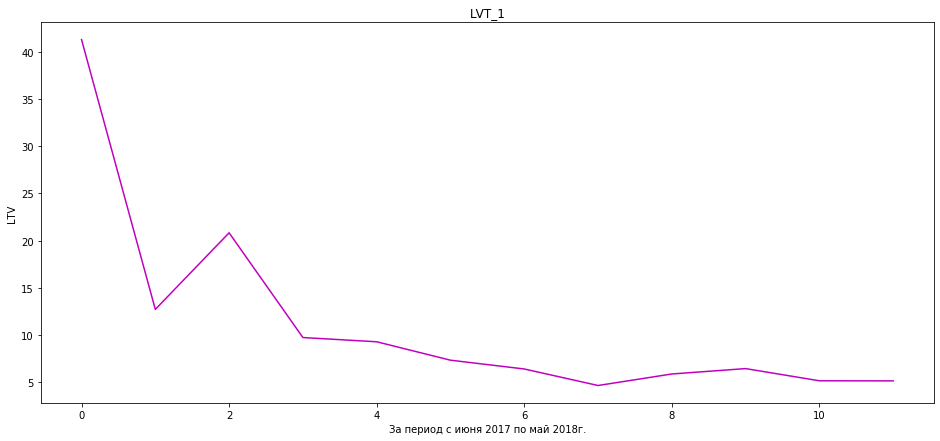

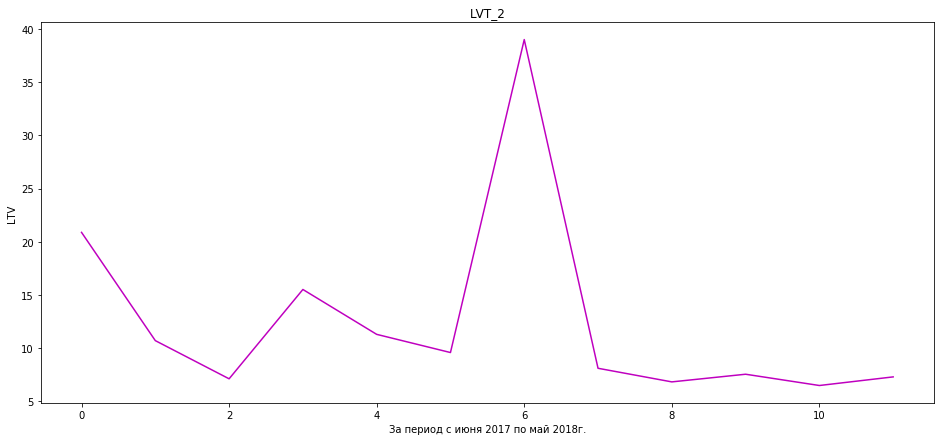

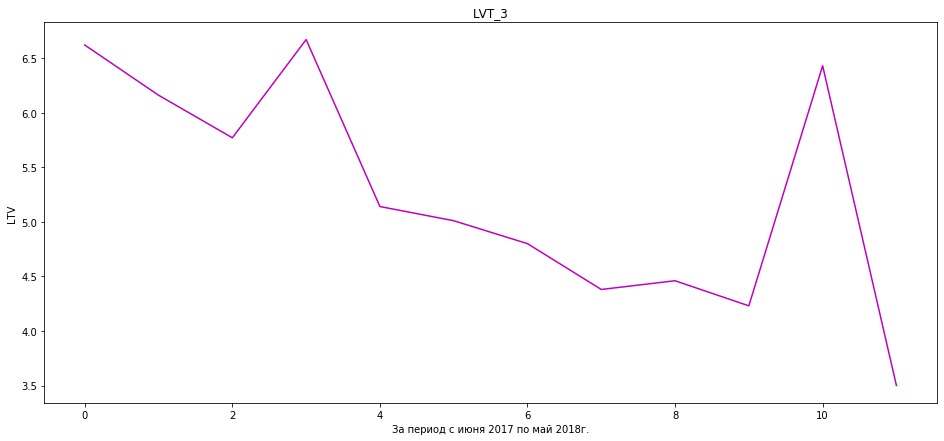

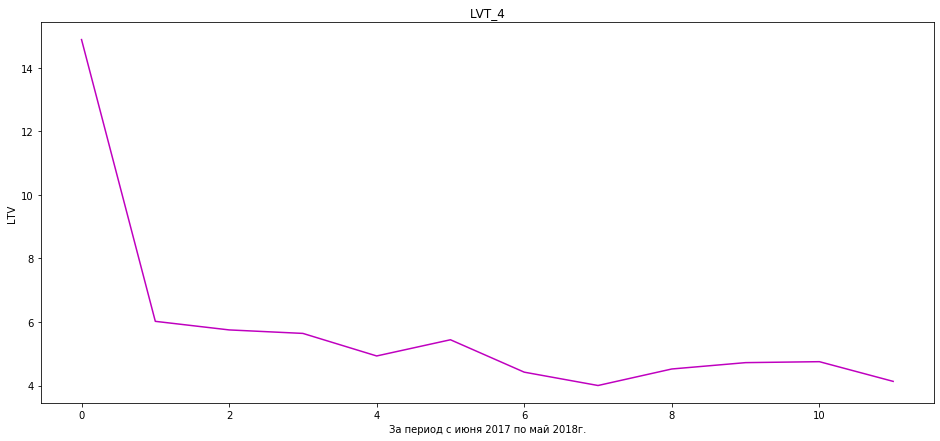

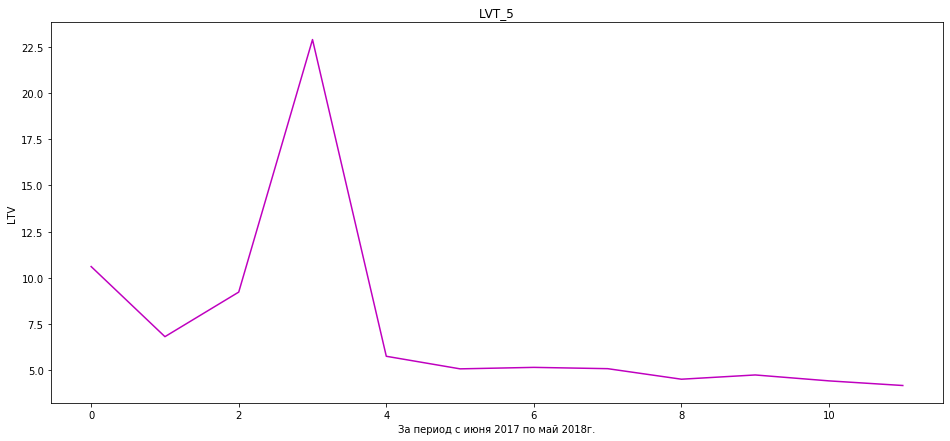

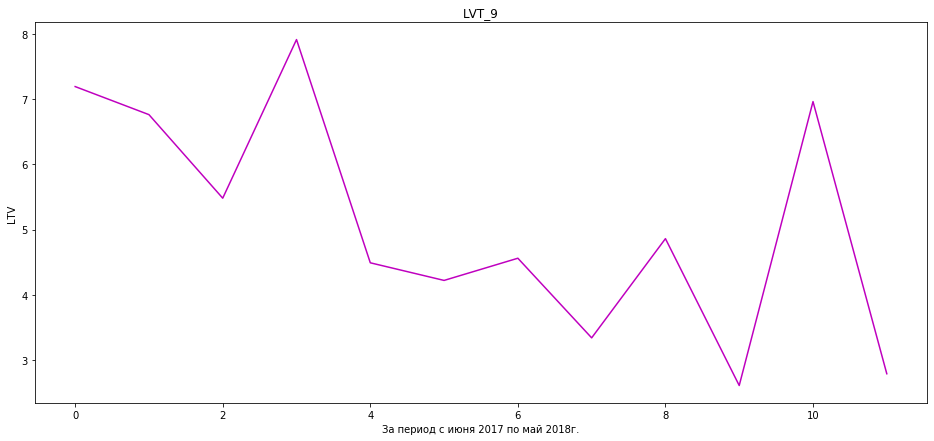

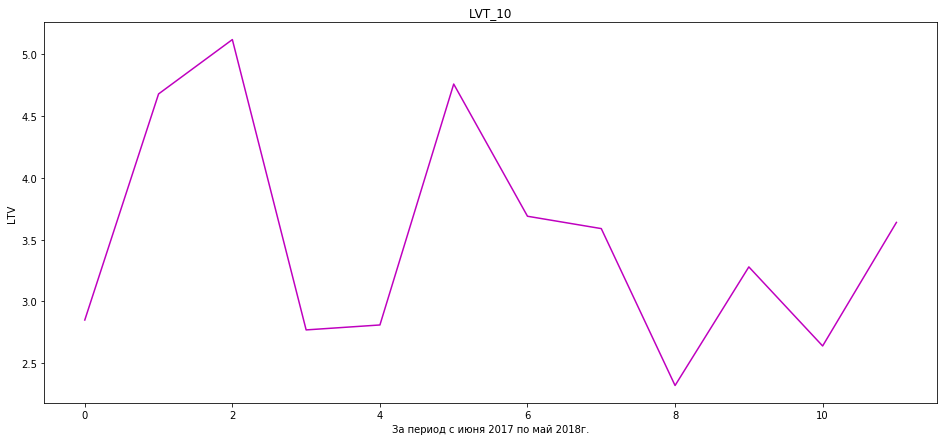

In [84]:
for x in temp_list:
    
    cohort_0_all[x].plot(figsize=(16,7), color = 'm')

    plt.title(x)
    plt.xlabel('За период с июня 2017 по май 2018г.')
    plt.ylabel('LTV')
    plt.show()

---
- LTV сильно колеблется в зависимости от источника
- Необходим анализ расходов на маркетинг
- Общий LTV за год равен 6.9
___

---
## Выводы по продажам
___

---
1. С возрастом когорты увеличивается количество покупок
2. Клиенты чаще покупают с компьютера
3. Большая часть (75%) совершает покупки в первые два дня, а половина в первые 16 минут
4. Мода равна одной минуте
5. Наиболее часто люди покупают в промежутке от 1 до 16 минут
6. Больше всего покупают в декабре с компьютеров
7. LTV сильно колеблется в зависимости от источника
8. Общий LTV за год равен 6.9
___

## Маркетинг
___

- Сколько денег потратили Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника
- На сколько окупились расходы (ROMI)

## Сколько денег потратили? Всего / на каждый источник / по времени
___

In [85]:
costs['costs'].describe()

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [86]:
print("Всего потратили на продвижение {0:.2f} тыс.руб".format(costs['costs'].sum()))

Всего потратили на продвижение 329131.62 тыс.руб


In [87]:
print("Отношение общей выручки к общим затратам {0:.2%}".format(orders['revenue'].sum().round()/costs['costs'].sum()))

Отношение общей выручки к общим затратам 76.58%


In [88]:
print('Валовая прибыль {:.2f}'.format(orders['revenue'].sum()-costs['costs'].sum()))

Валовая прибыль -77077.84


In [89]:
cost_source = costs.groupby(['source_id']).agg({'costs': 'sum'})
cost_source['share'] = cost_source['costs']/cost_source['costs'].sum()*100

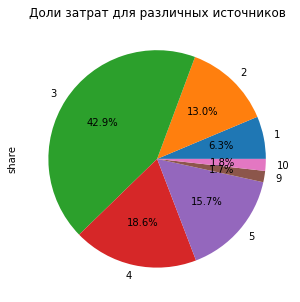

In [90]:
cost_source['share'].plot.pie(subplots=True,autopct='%1.1f%%', figsize=(5,5))
plt.title('Доли затрат для различных источников')
plt.show()

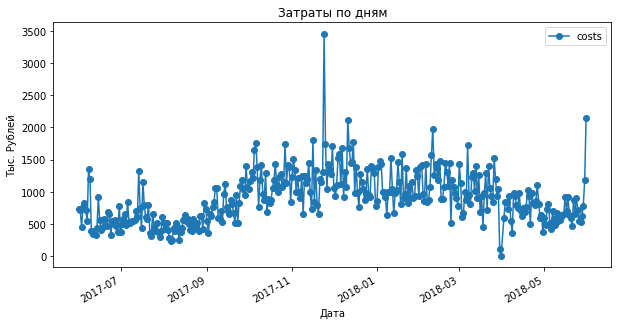

In [91]:
costs.groupby(['dt']).agg({'costs': 'sum'}).plot(style='o-', figsize=(10,5))

plt.title('Затраты по дням')
plt.xlabel('Дата')
plt.ylabel('Тыс. Рублей')
plt.show()

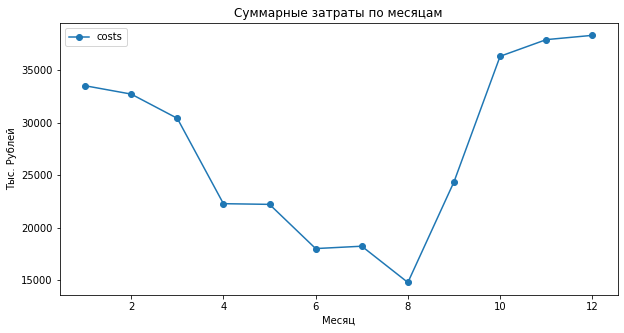

In [92]:
costs['month']  = costs['dt'].dt.month

costs.groupby(['month']).agg({'costs': 'sum'}).plot(style='o-', figsize=(10,5))

plt.title('Суммарные затраты по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Тыс. Рублей')
plt.show()

---
- Всего потратили на продвижение: 329131.62
- Валовая прибыль: -77077.84
- Отношение общей выручки к общим затратам: 76.58%
- Источник 3 занимает 43% затрат
- Минимальные затраты были летом
- Максимальные затраты с октября по декабрь, связанно с маштабной рекламной акцией перед праздником
___

## Сколько стоило привлечение одного покупателя из каждого источника?

In [93]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [94]:
for s_id in costs['source_id'].unique():
    cohort_0_all['CAC_'+str(s_id)] = round((costs.query('source_id == @s_id').groupby('month')['costs'].sum() /
        buy_time.query('source_id == @s_id').groupby('cohort')['uid'].nunique()
        ).reset_index()[0],2)

In [95]:
cohort_0_all

,cohort,cohort_users,revenue,LTV,LVT_1,LVT_2,LVT_3,LVT_4,LVT_5,LVT_7,LVT_9,LVT_10,CAC_1,CAC_2,CAC_3,CAC_4,CAC_5,CAC_9,CAC_10
0,2017-06-01,13259,40026.05,13.70,41.29,20.88,6.62,14.89,10.61,1.22,7.19,2.85,4.69,6.51,8.73,5.43,5.14,1.85,2.78
1,2017-07-01,13140,17812.11,7.25,12.72,10.70,6.16,6.02,6.82,NaN,6.76,4.68,5.83,8.39,11.56,5.24,6.04,3.03,5.41
2,2017-08-01,10181,13461.87,7.82,20.83,7.11,5.77,5.75,9.23,NaN,5.48,5.12,7.55,12.49,13.74,7.72,5.00,2.42,5.17
3,2017-09-01,16704,33682.56,11.02,9.74,15.51,6.67,5.64,22.88,NaN,7.91,2.77,6.06,11.27,10.54,7.44,5.60,3.52,4.80
4,2017-10-01,25977,27857.69,5.96,9.29,11.29,5.14,4.93,5.76,NaN,4.49,2.81,6.62,11.54,12.44,5.02,5.64,5.04,2.85
5,2017-11-01,27248,24426.72,5.74,7.34,9.58,5.01,5.44,5.08,NaN,4.22,4.76,7.39,12.80,13.42,4.20,9.36,4.44,5.78
6,2017-12-01,25268,31157.85,7.66,6.41,39.01,4.80,4.42,5.16,NaN,4.56,3.69,7.16,14.66,13.40,5.95,7.93,7.15,8.61
7,2018-01-01,22624,14546.82,4.66,4.66,8.10,4.38,4.00,5.09,NaN,3.34,3.59,9.85,16.90,15.86,5.98,9.21,9.95,5.96
8,2018-02-01,22197,15061.29,4.73,5.88,6.82,4.46,4.52,4.52,NaN,4.86,2.32,8.68,17.08,14.95,6.03,8.38,10.61,4.26
9,2018-03-01,20589,13770.16,4.85,6.45,7.54,4.23,4.72,4.75,NaN,2.61,3.28,7.51,15.11,17.03,6.76,10.94,5.06,3.17


In [96]:
total = costs.groupby('month')['costs'].sum().reset_index()
total.columns = ['cohort','costs_total']
cohort_0_all = cohort_0_all.merge(total)

In [97]:
cohort_0_all['CAC_total'] = round(cohort_0_all['costs_total'] / buy_time.groupby('cohort').agg({'uid':'nunique'}).reset_index()['uid'],2)

In [98]:
cohort_0_all.T

,0,1,2,3,4,5,6,7,8,9,10,11
cohort,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
cohort_users,13259,13140,10181,16704,25977,27248,25268,22624,22197,20589,15709,15273
revenue,40026.1,17812.1,13461.9,33682.6,27857.7,24426.7,31157.8,14546.8,15061.3,13770.2,9882.55,10368.1
LTV,13.7,7.25,7.82,11.02,5.96,5.74,7.66,4.66,4.73,4.85,5.23,4.48
LVT_1,41.29,12.72,20.83,9.74,9.29,7.34,6.41,4.66,5.88,6.45,5.16,5.15
LVT_2,20.88,10.7,7.11,15.51,11.29,9.58,39.01,8.1,6.82,7.54,6.48,7.29
LVT_3,6.62,6.16,5.77,6.67,5.14,5.01,4.8,4.38,4.46,4.23,6.43,3.5
LVT_4,14.89,6.02,5.75,5.64,4.93,5.44,4.42,4,4.52,4.72,4.75,4.13
LVT_5,10.61,6.82,9.23,22.88,5.76,5.08,5.16,5.09,4.52,4.75,4.43,4.18
LVT_7,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
temp_list = ['CAC_1','CAC_2','CAC_3','CAC_4','CAC_5','CAC_9','CAC_10']

In [100]:
for cac in temp_list:
    print('Медиана привлечение одного пользователя для',cac,round(cohort_0_all[cac].median(),2))

Медиана привлечение одного пользователя для CAC_1 7.29
Медиана привлечение одного пользователя для CAC_2 12.64
Медиана привлечение одного пользователя для CAC_3 13.58
Медиана привлечение одного пользователя для CAC_4 6.01
Медиана привлечение одного пользователя для CAC_5 8.16
Медиана привлечение одного пользователя для CAC_9 5.05
Медиана привлечение одного пользователя для CAC_10 4.53


---
- Средняя стоимость привлечения: 8.18
- Наиболее дешевый источник 10
- Наиболее дорогой источник 3
- Источник 3 занимает 43% затрат и привлекает максимальное число покупателей
___

## На сколько окупились расходы? (ROI)
___

In [101]:
six_months = cohorts_orders.query('cohort < "2017-12-01" and lifetime_cohort <= 6')

In [102]:
six_months = six_months.groupby('cohort')['LTV'].sum().reset_index().merge(cohort_0_all[['cohort','CAC_total']])

six_months['ROMI'] = round(six_months['LTV'] / six_months['CAC_total'],2)

In [103]:
six_months

,cohort,LTV,CAC_total,ROMI
0,2017-06-01,9.522201,6.17,1.54
1,2017-07-01,6.210460,7.42,0.84
2,2017-08-01,6.397025,8.59,0.74
3,2017-09-01,10.720514,7.97,1.35
4,2017-10-01,5.814833,7.76,0.75
5,2017-11-01,5.735318,8.90,0.64


In [104]:
six_months.describe().round(2)

,LTV,CAC_total,ROMI
count,6.00,6.00,6.00
mean,7.40,7.80,0.98
std,2.16,0.97,0.37
min,5.74,6.17,0.64
25%,5.91,7.50,0.74
50%,6.30,7.86,0.80
75%,8.74,8.44,1.22
max,10.72,8.90,1.54


In [105]:
six_months.query('ROMI >= 1').describe().round(2)

,LTV,CAC_total,ROMI
count,2.00,2.00,2.00
mean,10.12,7.07,1.44
std,0.85,1.27,0.13
min,9.52,6.17,1.35
25%,9.82,6.62,1.40
50%,10.12,7.07,1.44
75%,10.42,7.52,1.49
max,10.72,7.97,1.54


In [106]:
six_months.query('ROMI < 1').describe().round(2)

,LTV,CAC_total,ROMI
count,4.00,4.00,4.00
mean,6.04,8.17,0.74
std,0.32,0.69,0.08
min,5.74,7.42,0.64
25%,5.79,7.68,0.72
50%,6.01,8.18,0.74
75%,6.26,8.67,0.77
max,6.40,8.90,0.84


---
- При периоде 6 месяцев в среднем LTV составляет 7.4
- При периоде 6 месяцев в среднем CAC составляет 7.8
- Из когорт окупились только 0 и 3
___

## Выводы по маркетингу

---
1. Всего потратили на продвижение: 329131.62
2. Валовая прибыль: -77077.84
3. Отношение общей выручки к общим затратам: 76.58%
4. Источник 3 занимает 43% затрат
5. Минимальные затраты были летом
6. Максимальные затраты с октября по декабрь, связанно с маштабной рекламной акцией перед праздником
7. Средняя стоимость привлечения: 8.18
8. Наиболее дешевый источник 10, наиболее дорогой источник 3
10. При периоде 6 месяцев в среднем LTV составляет 7.4
11. При периоде 6 месяцев в среднем CAC составляет 7.8
12. Из когорт окупились только 0 и 3
13. Сейчас бизнес-проект убыточен
___

---
## Общий вывод
___

Проект убыточен, но до выходы в 0 не хватает каких-то 10%.

Выводы по продукту:

1. Основная аудитория использует компьютер, а длительность визитов с него в 2 раза выше, чем с телефона
1. Медиана времени посещения - 300 секунд, мода - 60 секунд
1. Большинство использует сайт меньше 15 минут
1. В среднем происходит около тысячи сессий в день
1. Наибольший рост посещаемости происходит с августа по ноябрь 2017,с приходом 2018 ситуация начала ухудшаться
1. Retention Rate со времене падает, в среднем, с 7% до 4% 
1. Зимой пользователи возвращаются чаще
---
Выводы по продажам:

1. С возрастом когорты увеличивается количество покупок
2. Клиенты чаще покупают с компьютера
3. Большая часть (75%) совершает покупки в первые два дня, а половина в первые 16 минут
4. Мода равна одной минуте
5. Наиболее часто люди покупают в промежутке от 1 до 16 минут
6. Больше всего покупают в декабре с компьютеров
7. LTV сильно колеблется в зависимости от источника
8. Общий LTV за год равен 6.9
---
Выводы по маркетингу:

1. Всего потратили на продвижение: 329131.62
2. Валовая прибыль: -77077.84
3. Отношение общей выручки к общим затратам: 76.58%
4. Источник 3 занимает 43% затрат
5. Минимальные затраты были летом
6. Максимальные затраты с октября по декабрь, связанно с маштабной рекламной акцией перед праздником
7. Средняя стоимость привлечения: 8.18
8. Наиболее дешевый источник 10, наиболее дорогой источник 3
10. При периоде 6 месяцев в среднем LTV составляет 7.4
11. При периоде 6 месяцев в среднем CAC составляет 7.8
12. Из когорт окупились только 0 и 3
13. Сейчас бизнес-проект убыточен
---